# Quantum Lab Activity: Dirac Notation, Born Rule, and Noise

This lab is a Code-to-Theory Bridge, connecting the abstract mathematical description of quantum states
with the physical outcomes of quantum measurement, and introducing the concept of real-world quantum noise.

We will use the Qiskit SDK to build a quantum circuit, extract its theoretical state vector,
manually calculate the measurement probabilities using the Born Rule, and then validate our results
through statistical simulation.

---
## 1. From Simple Vector Notation to Dirac Notation

In linear algebra, we represent vectors as columns in $\mathbb{C}^N$ (Complex space). In quantum mechanics,
we use **Dirac Notation**, or **Bra-Ket notation**, to represent vectors in the Hilbert Space.

### A. The Ket: The State Vector
A quantum state is represented by a **ket**, written as **$|\psi\rangle$**.
The ket is mathematically a **column vector** (a state vector) representing the complete description of the system.
$$
|\psi\rangle \rightarrow \begin{pmatrix} c_0 \\ c_1 \end{pmatrix}
$$
For a single qubit, the computational basis states are:
$|0\rangle = \begin{pmatrix} 1 \\ 0 \end{pmatrix} \quad \text{and} \quad |1\rangle = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$

### B. The Bra: The Dual Vector
The corresponding **bra**, written as **$\langle \psi |$**, is the Hermitian conjugate (conjugate transpose, denoted $\dagger$) of the ket.
It is mathematically a **row vector** where all elements of the ket have been transposed and complex-conjugated.
$$
\text{If } |\psi\rangle = \begin{pmatrix} c_0 \\ c_1 \end{pmatrix} \text{, then } \langle \psi | = \left( c_0^* \quad c_1^* \right)
$$

### C. The Bra-Ket: The Inner Product
The combination $\langle \phi | \psi \rangle$ is the **inner product** of the two states, which results in a scalar(a complex or real number).
This value is called the **probability amplitude**.

---
## 2. The Born Rule: Formal Principle for Measurement Probability

The **Born Rule** is the fundamental postulate that dictates how probability is extracted from the state vector.

The probability of measuring the system in a specific basis state (say, $|k\rangle$) is the square of the magnitude of the probability amplitude $\langle k | \psi \rangle$:

$$
P(k) = |\langle k | \psi \rangle|^2
$$

---

## 3. Lab Activity: Code-to-Theory Bridge

In [ ]:
#pip install
!pip install qiskit qiskit[visualization] qiskit-aer

In [ ]:
# Import necessary Qiskit components
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, DensityMatrix
import numpy as np

# --- Setup the Quantum Circuit: State Preparation ---
# We will create an equal superposition state: |psi> = H|0>
# define a quantum register with one qubit
q =  QuantumRegister(1,"qreg")

# define a classical register with one bit
# it stores the measurement result of the quantum part
c = ClassicalRegister(1,"creg")

# define our quantum circuit
qc = QuantumCircuit(q,c)
qc.h(0)

print("--- Quantum Circuit Setup (Hadamard Gate) ---")
qc.draw(output='text')

--- Quantum Circuit Setup (Hadamard Gate) ---


┌───┐
  qreg: ┤ H ├
        └───┘
creg: 1/═════

In [ ]:
# STEP A: State Vector Retrieval (Theoretical State)

# Use the Qiskit Statevector Simulator to extract the state vector |ψ⟩ before measurement
initial_state = Statevector.from_instruction(qc)
psi_vector = initial_state.data

print("\n--- Step A: State Vector Retrieval: |ψ⟩ ---")
print(f"Theoretical State Vector |ψ⟩ (Column Vector):\n{psi_vector}")

# Extract components for manual calculation: |ψ⟩ = α|0⟩ + β|1⟩
alpha = psi_vector[0]
beta = psi_vector[1]

print(f"Component α: {alpha}")
print(f"Component β: {beta}")


--- Step A: State Vector Retrieval: |ψ⟩ ---
Theoretical State Vector |ψ⟩ (Column Vector):
[0.70710678+0.j 0.70710678+0.j]
Component α: (0.7071067811865475+0j)
Component β: (0.7071067811865475+0j)


### Step 2: Manual Calculation (The Born Rule)

**STUDENT ACTION: Documentation and Calculation**

Based on the state vector components you retrieved in Step 1:
$|\psi\rangle = a|0\rangle + b|1\rangle$

1.  **Document the complex amplitude** for $|0\rangle$ (which is $a$) and $|1\rangle$ (which is $b$).
2.  **Manually calculate the theoretical probabilities** for measurement using the Born Rule:
    * $P(|0\rangle) = |a|^2$
    * $P(|1\rangle) = |b|^2$

Write your manual calculation steps in a dedicated markdown cell below.

<br>
<hr>

**[STUDENT ANSWERS MANUAL]**

The retrieved amplitudes are:
$a = (1/\sqrt{2}) \approx 0.7071$
$b = (1/\sqrt{2}) \approx 0.7071$

**Theoretical Probability Calculation:**
$P(|0\rangle) = |a|^2 = (1/\sqrt{2})^2 = 1/2 = 0.5$
$P(|1\rangle) = |b|^2 = (1/\sqrt{2})^2 = 1/2 = 0.5$

Total Probability Check: $0.5 + 0.5 = 1.0$

---

#### Code Check (Internal Verification)
The following code performs the same calculation to verify the manual step.

In [ ]:
# STEP B: Manual Calculation using the Born Rule

# We calculate the theoretical probability of measuring |0> and |1>
# P(0) = |<0|ψ>|^2 = |alpha|^2
# P(1) = |<1|ψ>|^2 = |beta|^2

# Probability of measuring |0> (overlap with basis state |0> = (1, 0))
# <0|ψ> = (1, 0) * (α, β)^T = α
P0_amplitude = alpha
P0_theoretical = np.abs(P0_amplitude)**2

# Probability of measuring |1> (overlap with basis state |1> = (0, 1))
# <1|ψ> = (0, 1) * (α, β)^T = β
P1_amplitude = beta
P1_theoretical = np.abs(P1_amplitude)**2

print("\n--- Step B: Manual Born Rule Calculation ---")
print(f"Theoretical Probability P(0): P(|0⟩) = |α|^2 = {P0_theoretical:.4f}")
print(f"Theoretical Probability P(1): P(|1⟩) = |β|^2 = {P1_theoretical:.4f}")
print(f"Total Probability Check (P(0)+P(1)): {P0_theoretical + P1_theoretical:.4f}")


--- Step B: Manual Born Rule Calculation ---
Theoretical Probability P(0): P(|0⟩) = |α|^2 = 0.5000
Theoretical Probability P(1): P(|1⟩) = |β|^2 = 0.5000
Total Probability Check (P(0)+P(1)): 1.0000


### Step 3: Validation (Statistical Simulation)


Run the circuit with a measurement on the QASM simulator for 10,000 shots. Compare the statistical results (empirical probabilities) to your theoretical calculations from Step 2.

In [ ]:
# STEP C: Validation: Statistical Simulation (QASM)

# 1. Add measurement to the circuit
# Create a copy of the circuit before adding measurements
qc_measured = qc.copy()
qc_measured.measure(q[0], c[0])
shots = 10000

# 2. Run the circuit on the QASM simulator
simulator = AerSimulator()
compiled_circuit = transpile(qc_measured, simulator)
job = simulator.run(compiled_circuit, shots=shots)
result = job.result()
counts = result.get_counts()

# 3. Calculate empirical probabilities
P0_empirical = counts.get('0', 0) / shots
P1_empirical = counts.get('1', 0) / shots


print(f"\n--- Step C: Validation: QASM Simulation ({shots} Shots) ---")
print(f"Raw Counts: {counts}")
print(f"Empirical Probability P(0): {P0_empirical:.4f}")
print(f"Empirical Probability P(1): {P1_empirical:.4f}")

print("\n--- Comparison ---")
print(f"Difference P(0): |{P0_theoretical:.4f} - {P0_empirical:.4f}| = {np.abs(P0_theoretical - P0_empirical):.4f}")
print("The statistical result closely matches the theoretical Born Rule prediction for a large number of trials.")


--- Step C: Validation: QASM Simulation (10000 Shots) ---
Raw Counts: {'0': 4974, '1': 5026}
Empirical Probability P(0): 0.4974
Empirical Probability P(1): 0.5026

--- Comparison ---
Difference P(0): |0.5000 - 0.4974| = 0.0026
The statistical result closely matches the theoretical Born Rule prediction for a large number of trials.



--- Histogram of Simulation Results ---


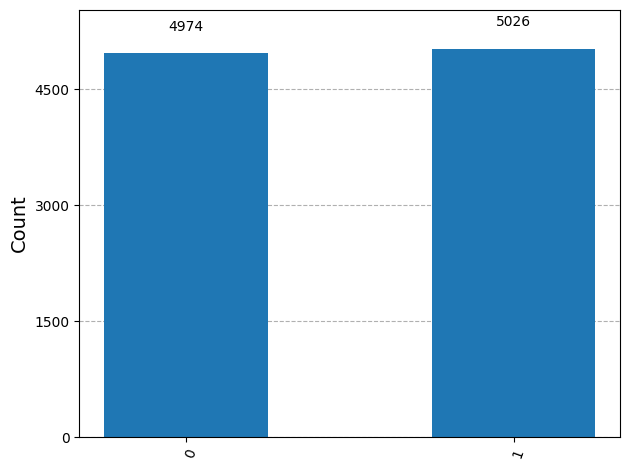

In [ ]:
#Code to make histogram to show the simulate results
from qiskit.visualization import plot_histogram

print("\n--- Histogram of Simulation Results ---")
plot_histogram(counts)

## 4. Noise Integration: Formal Models (Pure vs. Mixed States)

In the real world, quantum computers are highly sensitive to the environment, leading to **decoherence**. This noise forces us to move beyond the simple state vector description.

### A. The Ideal State: Pure State
The state vector $|\psi\rangle$ describes a **Pure State**, where we have maximum knowledge about the system.

### B. The Noisy State: Mixed State (Density Matrix $\rho$)
A **Mixed State** describes a quantum system that is a probabilistic mixture of multiple pure states. We use the **Density Matrix** ($\rho$, pronounced "rho") to describe this state, which naturally accounts for uncertainty and noise.

**Ideal Pure State Density Matrix:**
For a pure state $|\psi\rangle$, the density matrix is simply the outer product:
$$
\rho = |\psi\rangle \langle \psi |
$$

The diagonal elements of the density matrix always give the measurement probabilities: $\rho_{kk} = P(k)$.

### Density Matrix for the H-Gate Circuit

Let's calculate the Density Matrix for our initial, noiseless state $|\psi\rangle$.

In [ ]:
# Calculate the Density Matrix (rho) for the Pure State
# We use the theoretical state vector obtained earlier
rho = DensityMatrix(initial_state)

print("\n--- Density Matrix (ρ) for the Pure State ---")
print(np.round(rho.data, 4))
print("\nNote: The diagonal elements (ρ_00 and ρ_11) of the density matrix are the theoretical probabilities P(0) and P(1).")
print("They confirm the Born Rule calculation from Step B.")


--- Density Matrix (ρ) for the Pure State ---
[[0.5+0.j 0.5+0.j]
 [0.5+0.j 0.5+0.j]]

Note: The diagonal elements (ρ_00 and ρ_11) of the density matrix are the theoretical probabilities P(0) and P(1).
They confirm the Born Rule calculation from Step B.
